In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/iowa-liquor-mining/liquor.csv


In [2]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

cols = [1,5,8,9,17,18,19,20,21,22]

#pd.options.display.max_rows = 1000
#pd.options.display.max_columns = 20

In [3]:

dfinputdir = '/kaggle/input/iowa-liquor-mining/liquor.csv'
df = pd.read_csv(dfinputdir,usecols=cols)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sale (Dollars)'>

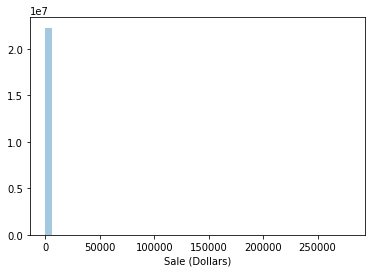

In [4]:
y = df['Sale (Dollars)']
sns.distplot(y, kde=False)

<AxesSubplot:title={'center':'Sales Based On County Number'}, xlabel='Sale (Dollars)', ylabel='County Number'>

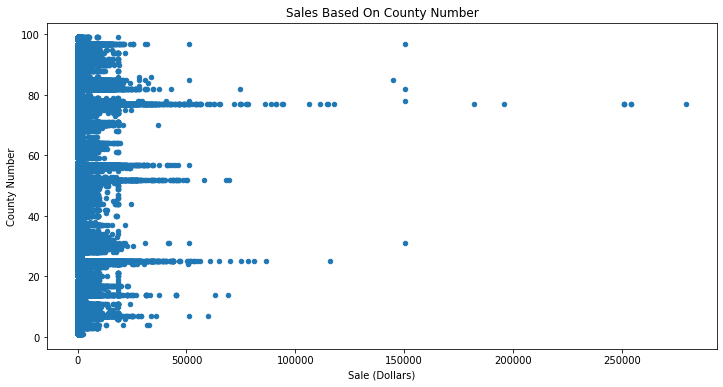

In [5]:
#df['Sale (Dollars)'].value_counts().sort_index().plot.bar()
df.plot.scatter(x='Sale (Dollars)', y='County Number',
                     figsize=(12, 6),
                     title='Sales Based On County Number')

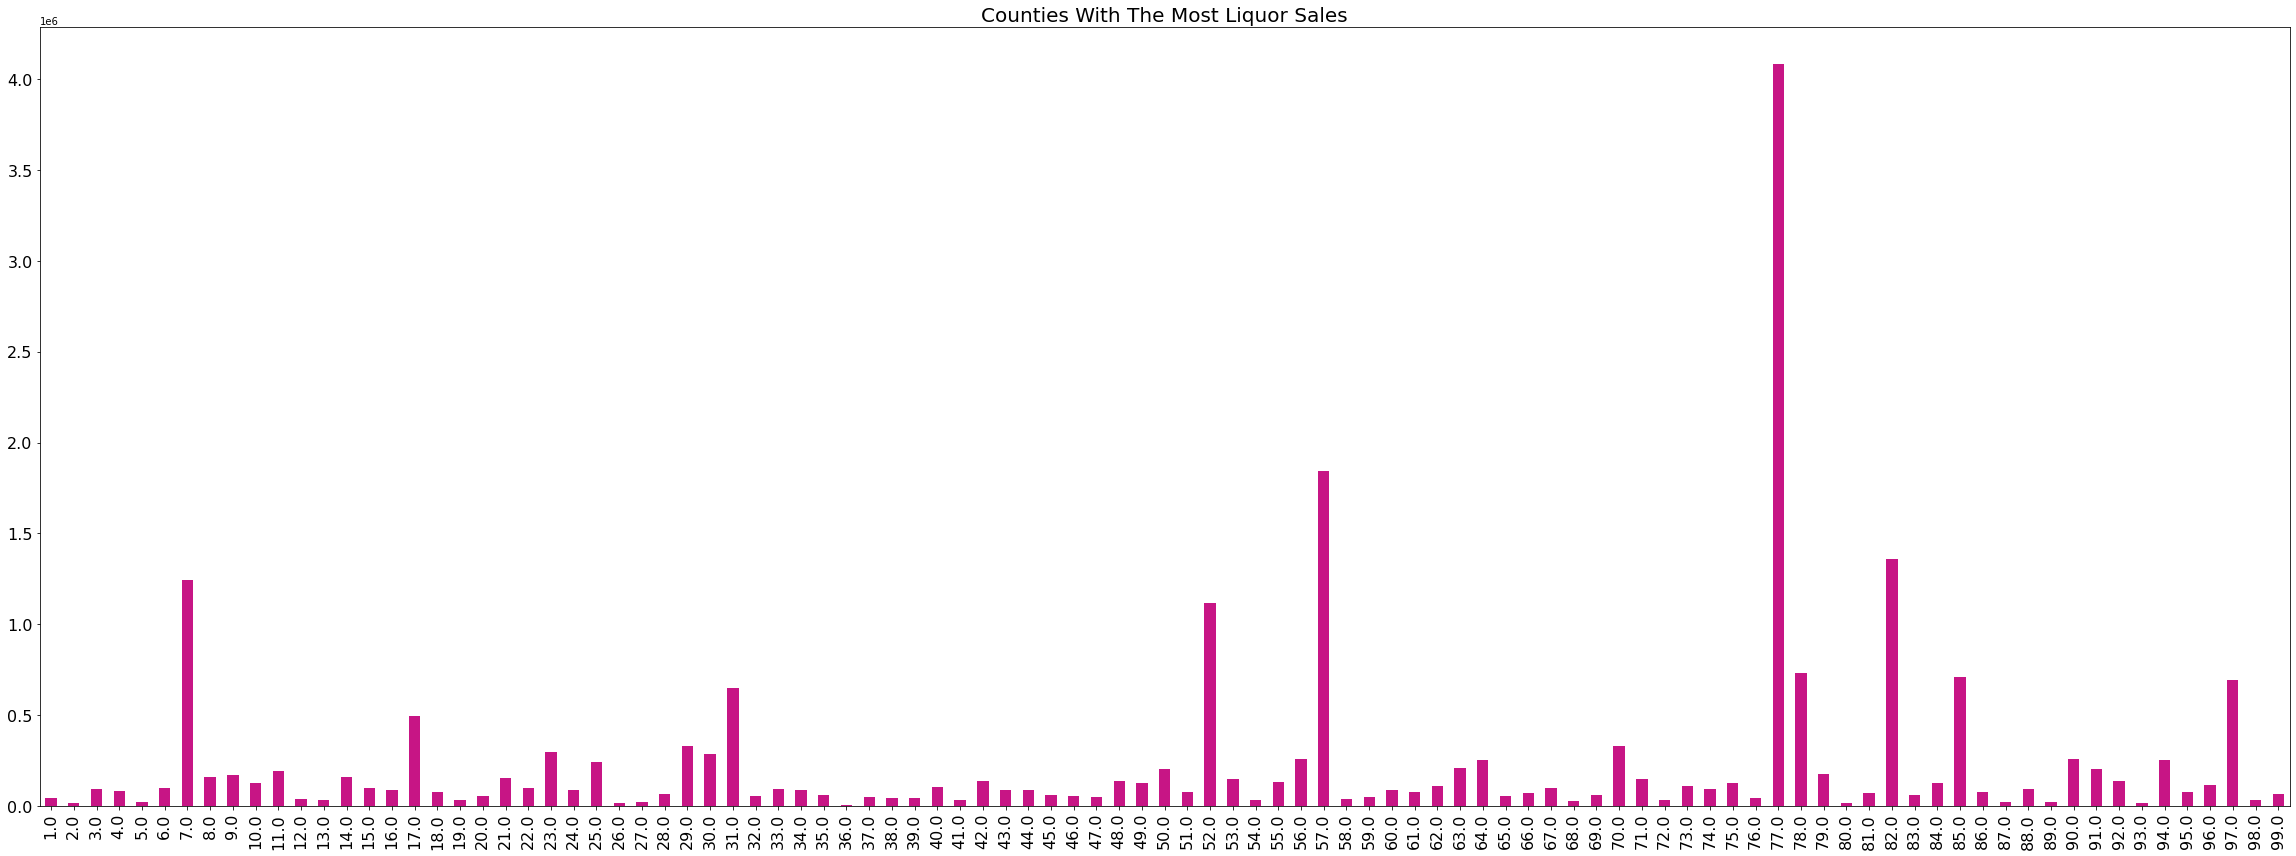

In [6]:
ax = df['County Number'].value_counts().sort_index().plot.bar(
    figsize=(32, 12),
    color='mediumvioletred',
    fontsize=16
)
ax.set_title("Counties With The Most Liquor Sales", fontsize=20)
plt.tight_layout()
plt.savefig("CountyLiqour1foralll12.jpg",bbox_inches="tight", pad_inches=6, dpi=150)

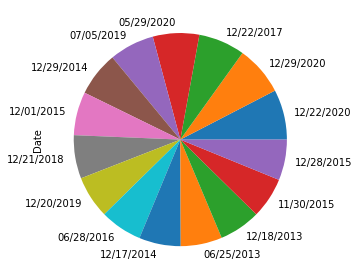

In [7]:
df['Date'].value_counts().head(15).plot.pie()

# Unsquish the pie.
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.savefig("dates15.jpg",bbox_inches="tight")

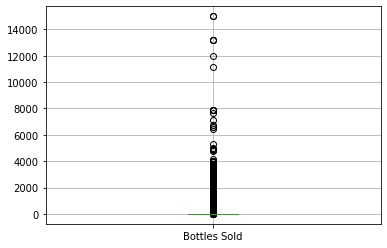

In [8]:
df.boxplot(column = ['Bottles Sold'])
plt.savefig("BottlesSold.jpg",bbox_inches="tight")

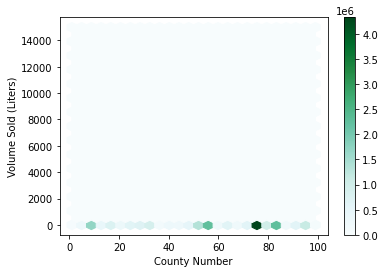

In [9]:
df.plot.hexbin(x='County Number', y='Volume Sold (Liters)', gridsize=25, sharex=False)
plt.savefig("VolumeCounty.jpg",bbox_inches="tight")

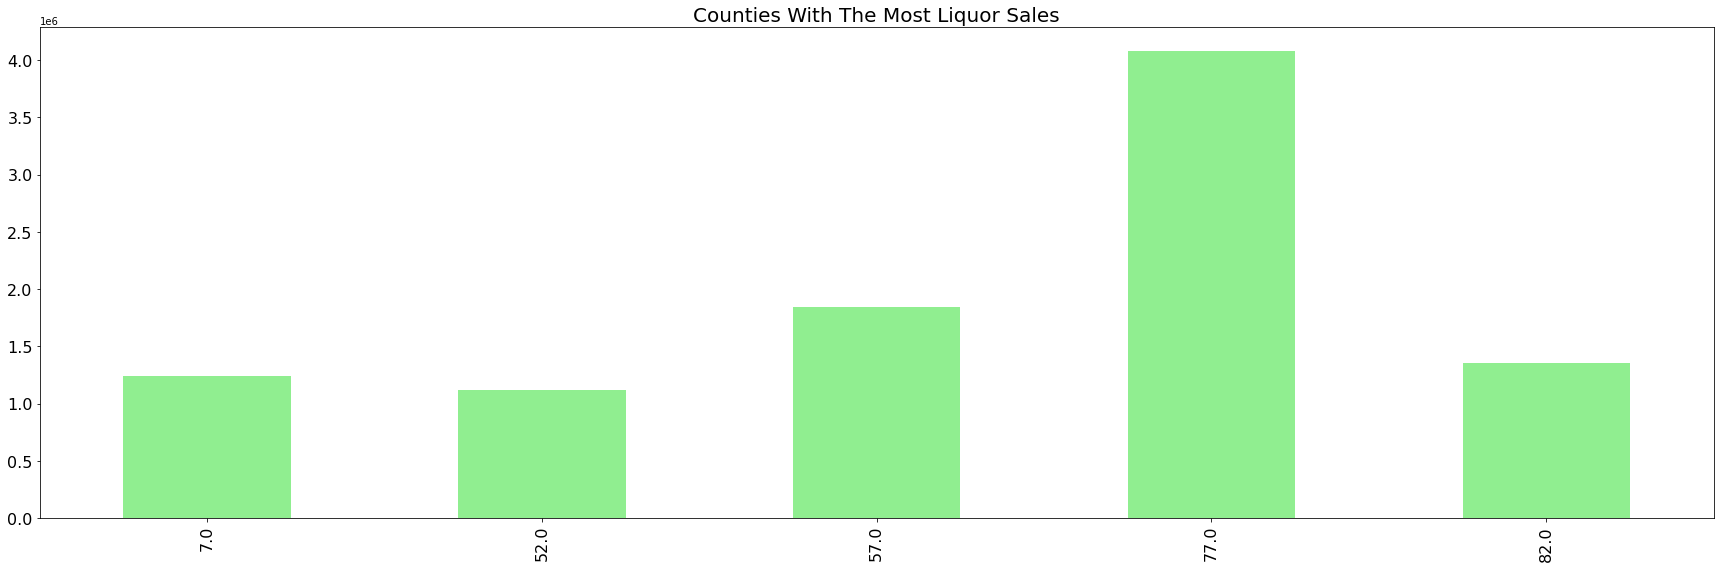

In [10]:
ax = df['County Number'].value_counts().head(5).sort_index().plot.bar(
    figsize=(24, 8),
    color='lightgreen',
    fontsize=16
)
ax.set_title("Counties With The Most Liquor Sales", fontsize=20)
plt.tight_layout()
plt.savefig("CountyLiqour1foralll12.jpg",bbox_inches="tight", pad_inches=6, dpi=150)

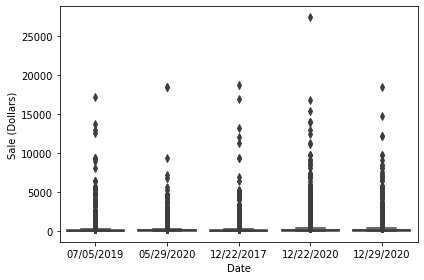

In [11]:
df1= df[df.Date.isin(df.Date.value_counts().head(5).index)]

sns.boxplot(
    x = 'Date',
    y = 'Sale (Dollars)',
    data = df1
)
plt.tight_layout()
plt.savefig("SaleAmountOnTopDatesReal.pdf",bbox_inches="tight", pad_inches=6, dpi=150)

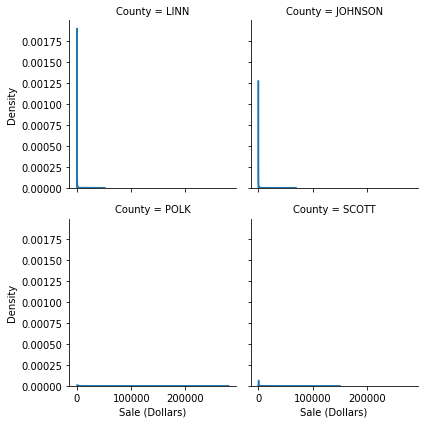

In [12]:
df1 = df[df['County'].isin(['LINN','POLK', 'SCOTT', 'JOHNSON'])]
g = sns.FacetGrid(df1, col = "County", col_wrap = 2)
g.map(sns.kdeplot, "Sale (Dollars)")
plt.tight_layout()
plt.savefig("SaleAmountOnTopDates.jpg",bbox_inches="tight", pad_inches=6, dpi=150)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


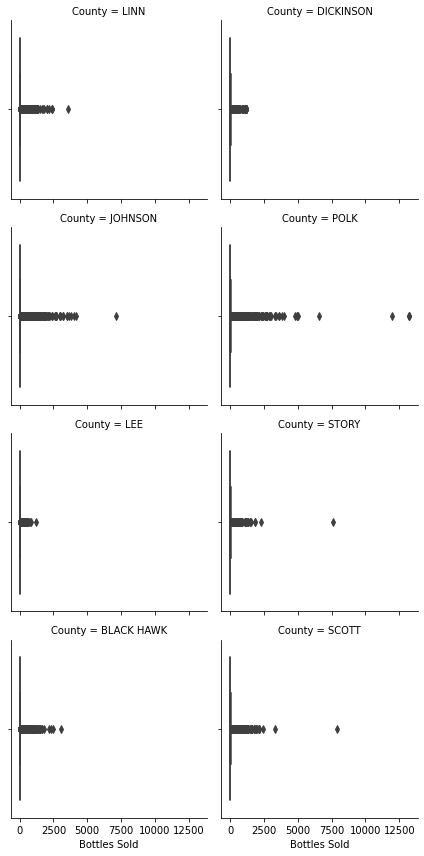

In [13]:
df1 = df[df['County'].isin(['LINN','POLK', 'SCOTT', 'JOHNSON', 'DICKINSON', 'BLACK HAWK', 'STORY', 'LEE'])]
g = sns.FacetGrid(df1, col = "County", col_wrap = 2)
g.map(sns.boxplot, "Bottles Sold")
plt.tight_layout()
plt.savefig("BottlesSoldPerCounty.pdf",bbox_inches="tight", pad_inches=6, dpi=150)

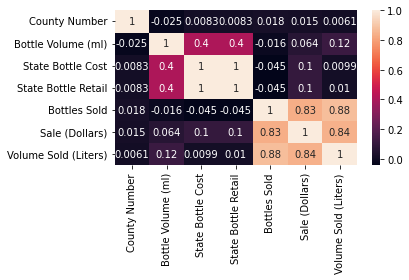

In [14]:
r = df.corr()
sns.heatmap(r,  annot = True)
plt.tight_layout()
plt.savefig("CorrelationChart.pdf",bbox_inches="tight", pad_inches=6, dpi=150)

<Figure size 2880x2880 with 0 Axes>

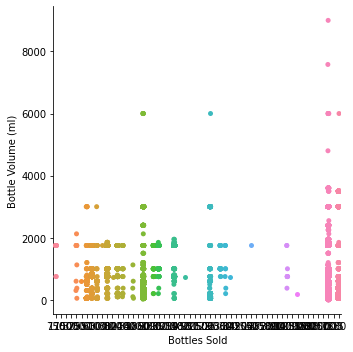

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize=(40,40))
sns.catplot(y ='Bottle Volume (ml)', x = "Bottles Sold",data = df,order=df['Bottle Volume (ml)'].value_counts().index)
plt.show()
plt.tight_layout()
plt.savefig("BottlesSold(exp).jpg",bbox_inches="tight", pad_inches=6, dpi=150)

<Figure size 2880x2880 with 0 Axes>

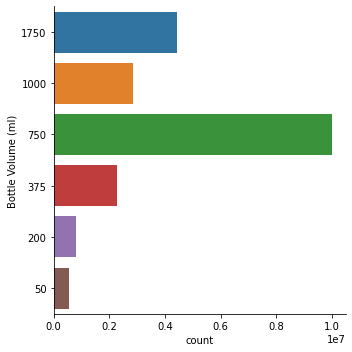

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize=(40,40))
category_order = [1750, 1000, 750, 375, 200, 50]
sns.catplot(y ='Bottle Volume (ml)', kind = "count",data = df, order = category_order)
plt.show()
plt.tight_layout()
plt.savefig("BottleVolume.pdf",bbox_inches="tight", pad_inches=6, dpi=150)

In [ ]:
plt.figure(figsize=(20,20))
sns.jointplot(x="Bottle Volume (ml)" , y="Bottles Sold" , data= df, height = 10 , kind="hex" , color="#FF6600")
plt.show()